In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.cm as cm

import ast
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# # 下载必要的资源，下载过了这里注释掉
# nltk.download('averaged_perceptron_tagger')
# nltk.download('punkt')
# nltk.download('punkt_tab')
# nltk.download('averaged_perceptron_tagger_eng')

In [2]:
# 读数据
def get_comment_and_attribute():
    comment_word_list = []
    attribute_list = []
    
    with open('D:/BERT_learing/CCDP/gcb/Linelevel/comment_attribute_false.txt', 'r') as f:
        # 直接读txt  之后的 lines 的类型是 str  需要把str 变为 list
        lines = f.readlines()
        
        for i in range(0, len(lines), 2):
#             print(type(lines[i].strip())) # str
            # str  ->  list
            w_list = ast.literal_eval(lines[i].strip())
            comment_word_list.append(w_list)
#             print(type(w_list))          # list
            
            w_list = ast.literal_eval(lines[i+1].strip())
            attribute_list.append(w_list)
            
    return comment_word_list,attribute_list

comment_word_list,attribute_list = get_comment_and_attribute()

In [3]:
# true comment lenth
len(comment_word_list)

965

In [4]:
# 把词恢复成句子 ， 对比一下  恢复成句子 和 不恢复成句子 有什么区别
def restore_CommentWord2Sentence(comment_WordList):
    comment_sentence = []
    for comment_number in comment_WordList:

        # 将列表内的 一个个单词 组合成 句子 
        sentence = ' '.join(comment_number)
        # 去除句子中多余的空格
        sentence = sentence.replace(' .', '.')
        comment_sentence.append(sentence)
        
    return comment_sentence

comment_sentence = restore_CommentWord2Sentence(comment_word_list)

In [5]:
# 用的 word_tokenize(sentence) 分词，  使用上述的 comment_sentence
def get_WordTagging_attribution_for_sentence(comment_sentence_list):
    tagged_sentence_list = []
    for sentence in comment_sentence_list:
        words = word_tokenize(sentence)
        tagged_words = pos_tag(words)
        tagged_sentence_list.append(tagged_words)
        
    return tagged_sentence_list
tagged_sentence_list = get_WordTagging_attribution_for_sentence(comment_sentence)

In [6]:
# 读数据之后直接用， 不是用的word_tokenize(sentence)分词，与get_WordTagging_attribution_for_sentence对比结果
def get_WordTagging_attribution_for_word(comment_list):
    tagged_words_list = []
    for tag in comment_list:
        tagged_words = pos_tag(tag)
        tagged_words_list.append(tagged_words)
    
#     # 过滤掉标点符号 , 可以不过滤
#     filtered_tagged_words\
#     = [word for word in tagged_words\
#        if word[1] not in ['.', ',', ';', ':', '(', ')', '[', ']', '{', '}', '!', '?', '``', "''"]]
    return tagged_words_list

tagged_words_list = get_WordTagging_attribution_for_word(comment_word_list)

测试函数

In [7]:
# 使用这个对比下面两种情况 用 3 或 8 试试
comment_word_list[3]

['Returns']

In [8]:
tagged_sentence_list[3]

[('Returns', 'NNS')]

In [9]:
tagged_words_list[3]

[('Returns', 'NNS')]

In [10]:
comment_word_list[3]

['Returns']

In [11]:
tagged_sentence_list[8]

[('Unsubscribes', 'IN'),
 ('the', 'DT'),
 ('resource', 'NN'),
 ('from', 'IN'),
 ('this', 'DT'),
 ('channel', 'NN'),
 (',', ','),
 ('if', 'IN'),
 ('it', 'PRP'),
 ('exists', 'VBZ'),
 ('.', '.')]

In [12]:
tagged_words_list[8]

[('Unsubscribes', 'IN'),
 ('the', 'DT'),
 ('resource', 'NN'),
 ('from', 'IN'),
 ('this', 'DT'),
 ('channel', 'NN'),
 (',', ','),
 ('if', 'IN'),
 ('it', 'PRP'),
 ('exists', 'VBZ'),
 ('.', '.')]

In [13]:
len(tagged_words_list[8])

11

In [14]:
len(attribute_list[8])

11

测试结束

In [15]:
# 返回列表，列表内元素为元组，元组（comment_token , tagging , attribution）
def get_commentToken_tagging_attribution(tagged_token_list,attribute_num_list):
    commentToken_tagging_attribution = []
    for token, attribute in zip(tagged_token_list,attribute_num_list) :
        updated_tagged_words = [(word, tag, attr) for (word, tag), attr in zip(token, attribute)]
        commentToken_tagging_attribution.append(updated_tagged_words)
    return commentToken_tagging_attribution

commentToken_tagging_attribution = get_commentToken_tagging_attribution(tagged_words_list,attribute_list)

In [16]:
commentToken_tagging_attribution[8]

[('Unsubscribes', 'IN', 0.21294308095264158),
 ('the', 'DT', -0.04943915861823785),
 ('resource', 'NN', -0.08060215261119918),
 ('from', 'IN', -0.022618888924500802),
 ('this', 'DT', -0.025140559397935747),
 ('channel', 'NN', -0.0054125277011276935),
 (',', ',', -0.04445884030093959),
 ('if', 'IN', -0.06134541593350258),
 ('it', 'PRP', -0.05570969630870393),
 ('exists', 'VBZ', -0.019108220431082273),
 ('.', '.', 0.006765500458796687)]

In [17]:
from collections import Counter

def static_tagging_type(data):
    punctuations = {'.', ',', ';', ':', '(', ')', '[', ']', '{', '}', '!', '?', '``', "''"}

    second_elements = [tag for sentence in data for _, tag, _ in sentence]

    # 统计词性出现的次数
    counter = Counter(second_elements)
    counter_list = list(counter.items()) 
    counter_list_new = [ele for ele in counter_list if ele[0] not in punctuations]
    
    
    # 把子类别归类 ：例如 NN  NNS 为一大类都是名词
    # 定义词性标签集合: 名词  动词  形容词 副词 连词 限定词 代词
    tag_groups = {
        'noun': {'NN', 'NNS', 'NNP', 'NNPS'},
        'verb': {'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'},
        'adjective': {'JJ', 'JJR', 'JJS'},
        'adverb': {'RB', 'RBR', 'RBS'},
        'conjunction': {'CC', 'IN'},
        'determiner': {'DT', 'PDT', 'WDT'},
        'pronoun': {'PRP', 'PRP$', 'WP', 'WP$'}
    }
    pos_counts = {key: 0 for key in tag_groups}

    # 进行类别求和操作并处理未分类词性
    unclassified_tags = [(tag, count) for tag, count in counter_list_new if not any(tag in group for group in tag_groups.values())]
    for tag, count in counter_list_new:
        for group, tags in tag_groups.items():
            if tag in tags:
                pos_counts[group] += count

    # 将未分类词性加入到最终结果列表中
    final_result = list(pos_counts.items()) + unclassified_tags

    
    # 按照出现次数逆序排序
    sorted_data = sorted(final_result, key=lambda x: x[1], reverse=True)

    return sorted_data

counter_tagging_type = static_tagging_type(commentToken_tagging_attribution)

In [18]:
counter_tagging_type

[('noun', 3654),
 ('verb', 1406),
 ('determiner', 1398),
 ('adjective', 1237),
 ('conjunction', 1093),
 ('adverb', 190),
 ('TO', 179),
 ('MD', 89),
 ('CD', 59),
 ('pronoun', 39),
 ('#', 13),
 ('POS', 11),
 ('WRB', 9),
 ('EX', 8),
 ('SYM', 7),
 ('RP', 4),
 ('$', 2),
 ('FW', 1)]

In [19]:
# 这个函数需要修改

# 取  出现次数最多  并且是  句子主成分  的词性
# 暂定的  出现次数最多的前10个   句子主成分 还需调整
def filter_tagging_type(tagging_list):
    # 主要词性：名词，代词，动词，形容词，副词，介词短语
    main_type = ['NN','PRP','VB','JJ','RB','IN']
    tagging_list_top10 = tagging_list[:10]
    tagging_list_other = tagging_list[10:]
    tagging_list_main = [ele for ele in tagging_list_other if ele[0] in main_type]
    tagging_list_final = tagging_list_top10 + tagging_list_main
    
    return tagging_list_final

counter_tagging_type_filter = filter_tagging_type(counter_tagging_type)

In [20]:
counter_tagging_type_filter,len(counter_tagging_type_filter)

([('noun', 3654),
  ('verb', 1406),
  ('determiner', 1398),
  ('adjective', 1237),
  ('conjunction', 1093),
  ('adverb', 190),
  ('TO', 179),
  ('MD', 89),
  ('CD', 59),
  ('pronoun', 39)],
 10)

In [21]:
commentToken_tagging_attribution[0]

[('Creates', 'NNS', 0.30863075467411877),
 ('elastic', 'JJ', 0.10486400454861486),
 ('node', 'NN', -0.14722686672157287),
 ('as', 'IN', -0.08880104445672343),
 ('single', 'JJ', -0.013625370124243216),
 ('member', 'NN', -0.07319367033288326),
 ('of', 'IN', -0.037493350917411884),
 ('a', 'DT', -0.01609454122320672),
 ('cluster', 'NN', -0.01186327197077448),
 ('.', '.', -0.0008375138637301661)]

In [22]:
def get_tagging_type_attribution(filter_tagging,token_tagging_attribution):
    filter_type = [ele[0] for ele in filter_tagging]
    
    tag_groups = {
        'noun': {'NN', 'NNS', 'NNP', 'NNPS'},
        'verb': {'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'},
        'adjective': {'JJ', 'JJR', 'JJS'},
        'adverb': {'RB', 'RBR', 'RBS'},
        'conjunction': {'CC', 'IN'},
        'determiner': {'DT', 'PDT', 'WDT'},
        'pronoun': {'PRP', 'PRP$', 'WP', 'WP$'}
    }
    
    # 根据字典映射，将子类别改为父类别
    mapping = {tag: key for key, tags in tag_groups.items() for tag in tags}
    
    # 此处为 commentToken_tagging_attribution 将 第二列 替换为 tag_groups 值
    token_tagging_attribution_for_Ftype = [[(token, mapping.get(tag, tag), value)for token,tag,value in elements] \
                                           for elements in token_tagging_attribution]
    
    new_token_tagging_attribution = [(tag, attr) for elements in token_tagging_attribution_for_Ftype \
                                     for _,tag,attr in elements if tag in filter_type]
    


    
    return new_token_tagging_attribution

new_token_tagging_attribution = get_tagging_type_attribution(counter_tagging_type_filter,commentToken_tagging_attribution)

In [23]:
# 获得过滤之后的  词性 和 贡献值  
new_token_tagging_attribution[:3]

[('noun', 0.30863075467411877),
 ('adjective', 0.10486400454861486),
 ('noun', -0.14722686672157287)]

将数据 * 10 便于观察结果

In [24]:
comment_df = pd.DataFrame(new_token_tagging_attribution, columns=['Tag', 'Value'])
comment_df['Value'] = comment_df['Value']
comment_df.head()

,Tag,Value
0,noun,0.308631
1,adjective,0.104864
2,noun,-0.147227
3,conjunction,-0.088801
4,adjective,-0.013625


In [25]:
def get_list_print_df(df, name):
    col_list = []
    for i in range(len(df)):
        if df.loc[i]['Tag'] == name:
            attr = df.loc[i]['Value']
            col_list.append(attr)
    df = pd.DataFrame(col_list, columns=[name])
    return df

In [26]:
def get_all_df(df):
    unique_values = df['Tag'].value_counts().index
    plt.figure(figsize=(40,10))

    for uniq in unique_values:
        attr = get_list_print_df(df, uniq)

        sns.kdeplot(data=attr, x=uniq, label=uniq, bw_adjust=8)

        xticks = np.arange(min(attr[uniq]), max(attr[uniq]), step=0.5)
        plt.xticks(xticks)
        # 添加图例
    plt.legend()
    plt.axvline(x=0, color='r', linestyle='--')  # 在 x=0 的位置添加一条红色的虚线
    plt.show()

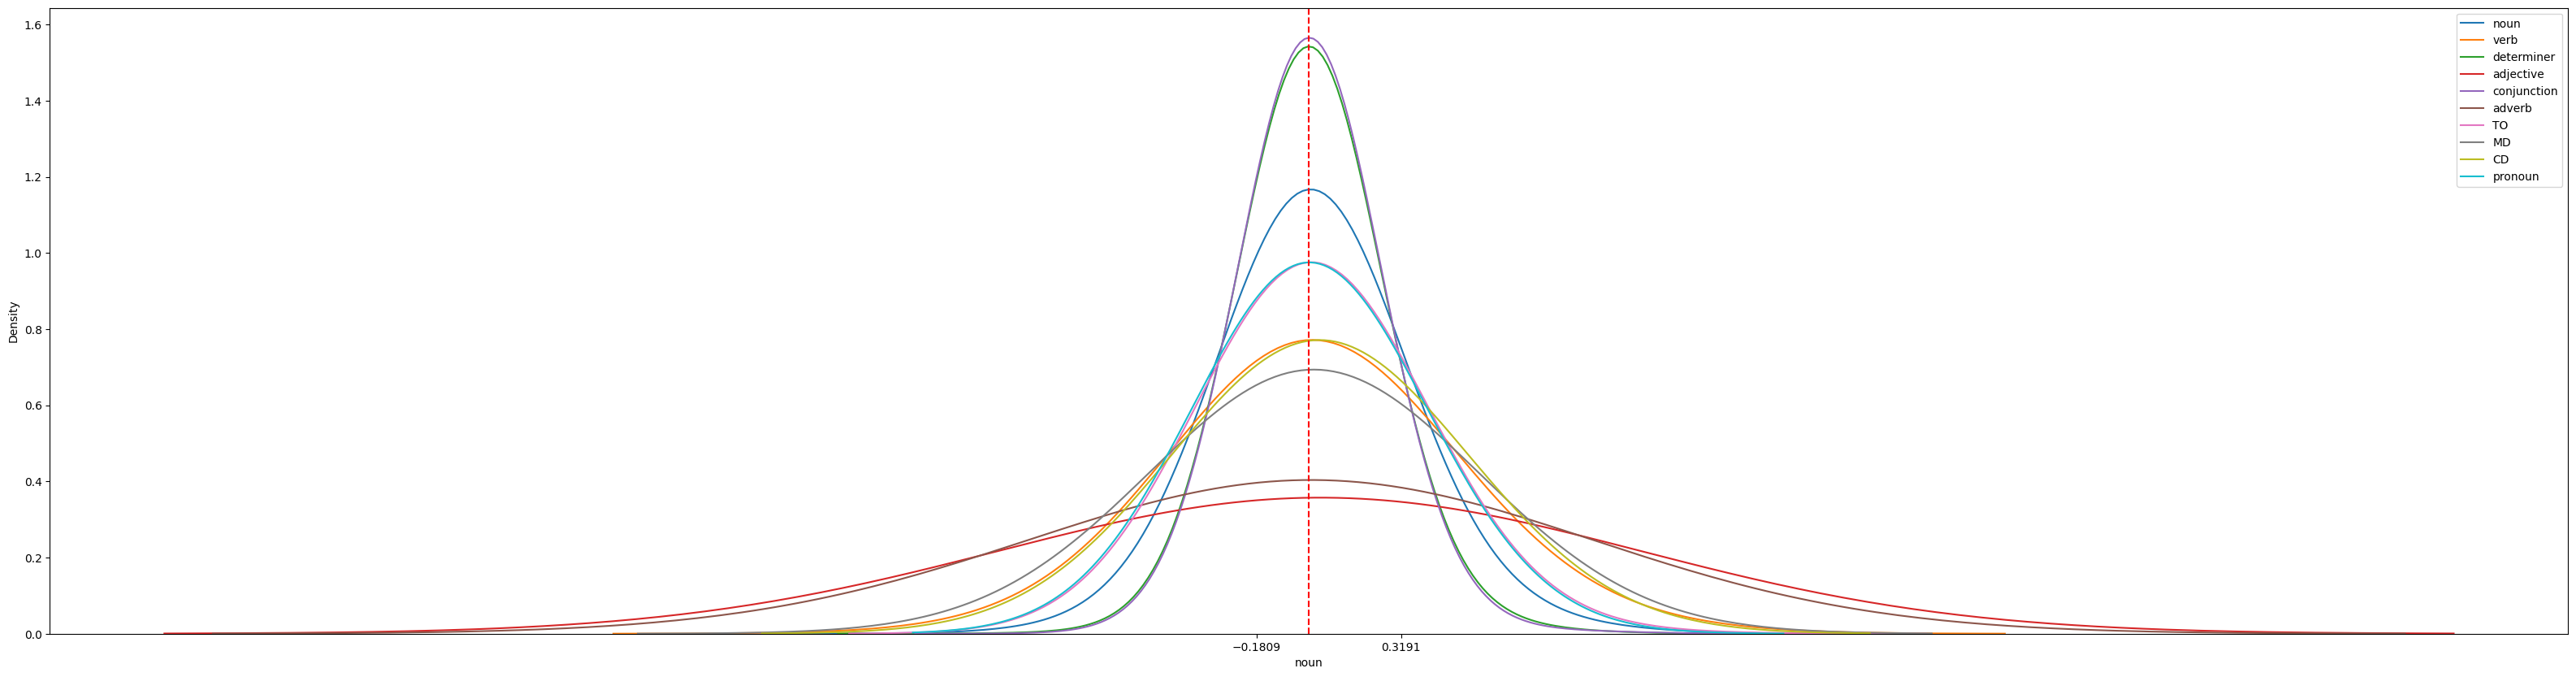

In [27]:
get_all_df(comment_df)

In [28]:
def get_all_colunm_df(df):
    unique_values = df['Tag'].value_counts().index
    result = pd.DataFrame()

    for uniq in unique_values:
        attr = get_list_print_df(df, uniq)
        result = pd.concat([result, attr], axis=1)
    column_order = ['noun','verb','adjective', 'adverb','conjunction','determiner','pronoun','TO','MD','CD']
    # 重新排序列名
    result = result[column_order]  
    return result 

In [29]:
comment_df_all_type = get_all_colunm_df(comment_df)
comment_df_all_type.head()

,noun,verb,adjective,adverb,conjunction,determiner,pronoun,TO,MD,CD
0,0.308631,0.055413,0.104864,0.083484,-0.088801,-0.016095,-0.055710,0.249609,0.051728,0.158738
1,-0.147227,0.058519,-0.013625,-0.958353,-0.037493,0.001650,0.009587,0.135214,-0.009205,0.018925
2,-0.073194,-0.324562,-0.056158,-0.017447,-0.086454,0.229381,-0.007516,0.115769,0.031983,0.063610
3,-0.011863,0.412151,0.010260,0.003761,0.035270,0.140302,0.146850,-0.046084,-0.112720,0.040348
4,-0.008437,0.342226,-0.004846,-0.024650,-0.119017,-0.021734,-0.087795,-0.036791,0.001974,0.007544


In [30]:
abs_df = comment_df_all_type.abs()
mean_abs_values = abs_df.mean()
mean_abs_values

noun           0.117358
verb           0.140513
adjective      0.369827
adverb         0.176892
conjunction    0.069638
determiner     0.068470
pronoun        0.064297
TO             0.081904
MD             0.109239
CD             0.084794
dtype: float64

In [31]:

# 名词  动词 限定词 形容词 连词 副词 不定式 情态动词 基数词 代词
mean_value = comment_df_all_type.mean()
mean_value 

noun           0.015497
verb           0.022172
adjective      0.031809
adverb         0.003309
conjunction    0.007437
determiner     0.007040
pronoun        0.005796
TO             0.017544
MD             0.016434
CD             0.041044
dtype: float64

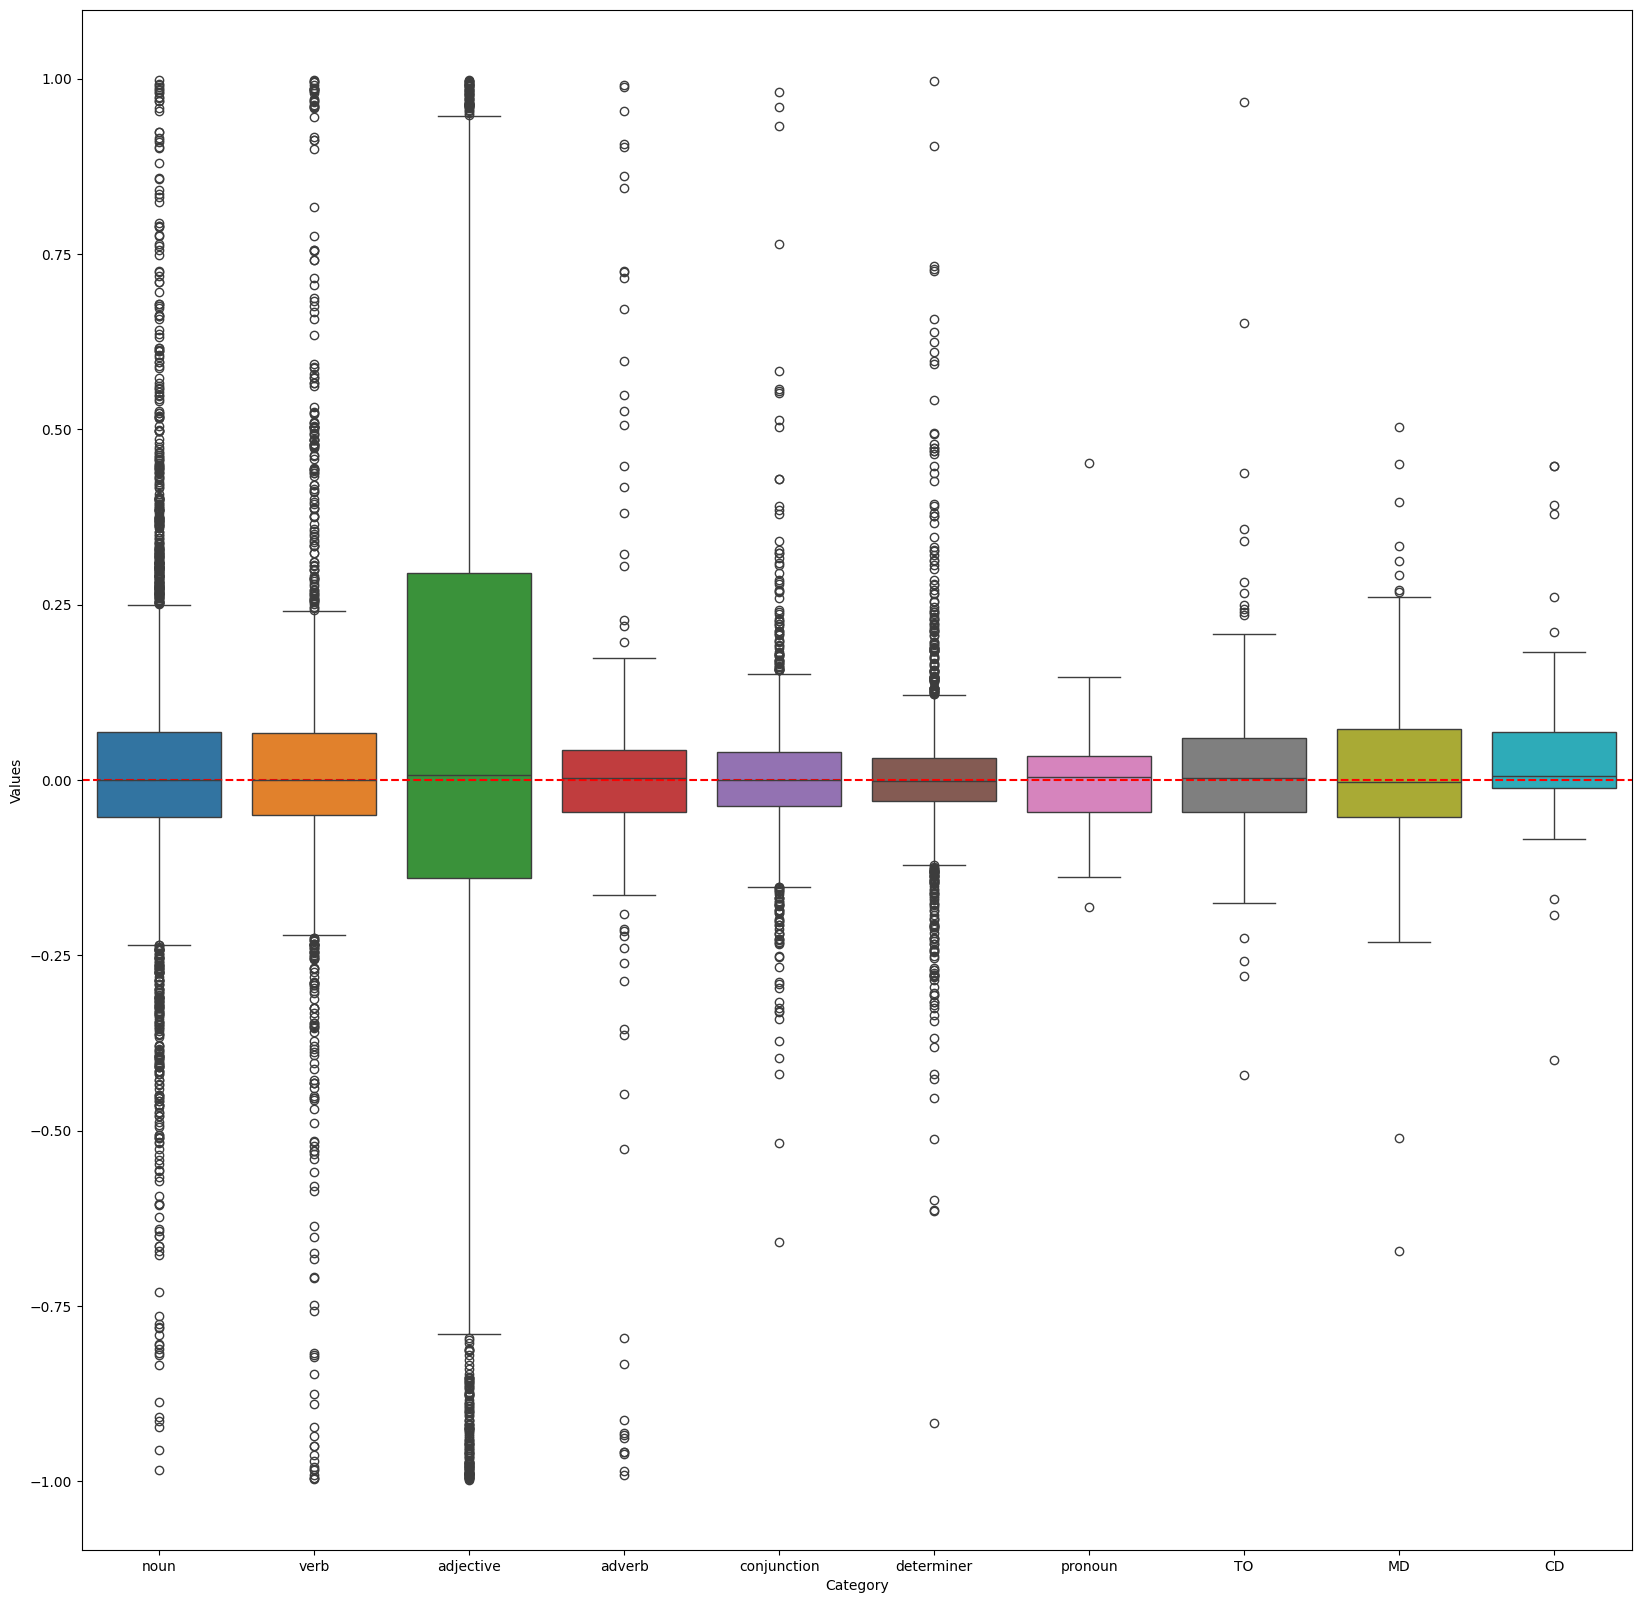

In [32]:
# 绘制箱线图
plt.figure(figsize=(20, 20))
sns.boxplot(data=comment_df_all_type)

plt.xlabel('Category')
plt.ylabel('Values')

plt.axhline(y=0, color='r', linestyle='--')
plt.show()

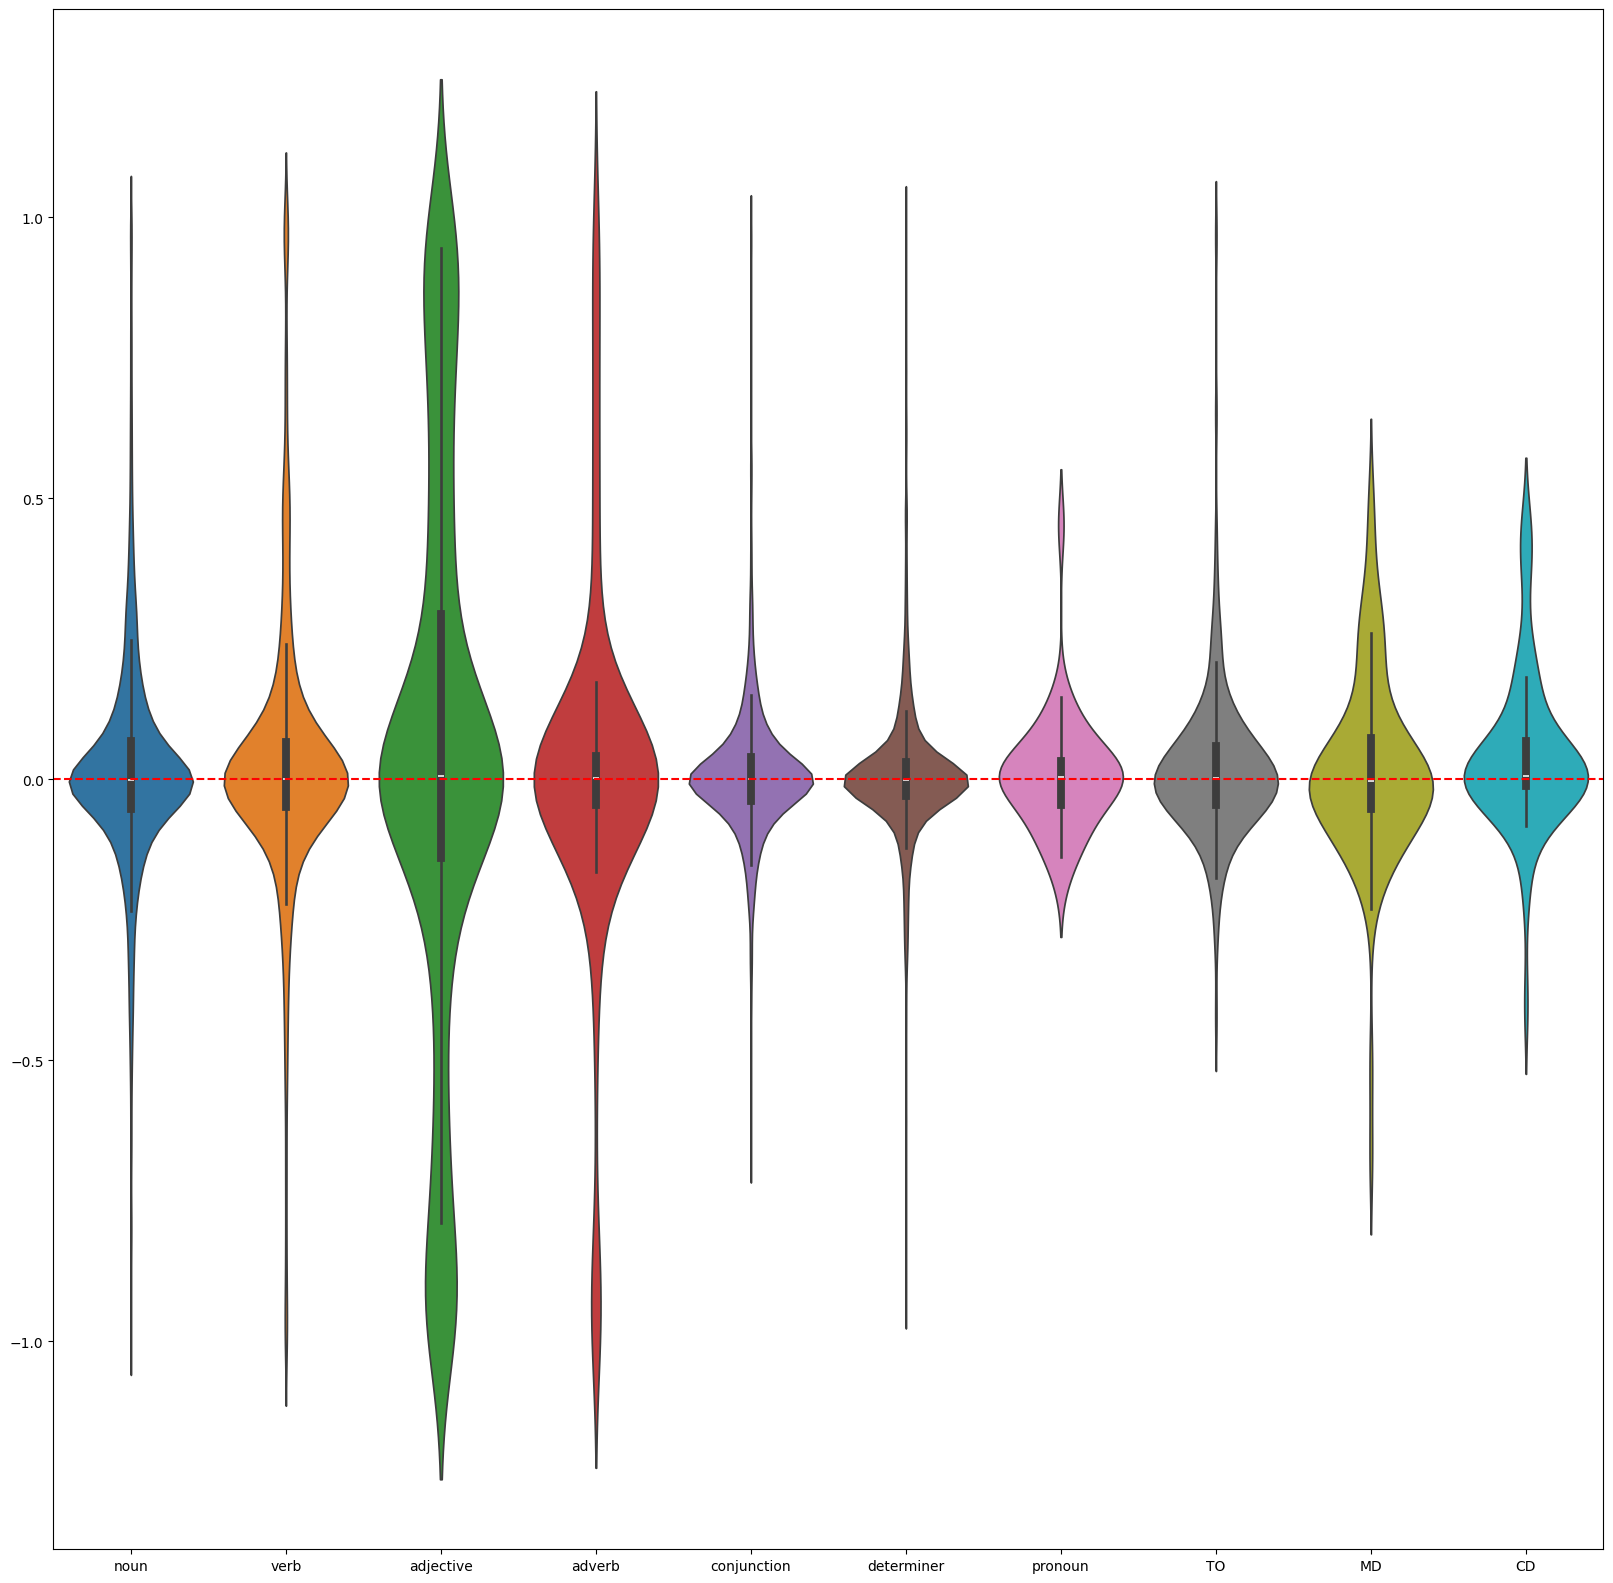

In [33]:
# 数据 x 10  小提琴图
plt.figure(figsize=(20,20))
sns.violinplot(data=comment_df_all_type)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [34]:
# 画出和论文一样的图
def get_paper_picture(df):
    
    # 图形大小，随时改
    plt.figure(figsize=(30, 8))

    # 定义颜色
    palette = sns.color_palette('pastel')

    # 画图
    for i, col in enumerate(df.columns):
        # 小提琴
        sns.violinplot(x=np.full(len(df), i), y=df[col], inner=None, hue=np.full(len(df), i), palette=[palette[i]], legend=False)
        # 散点图
        sns.stripplot(x=np.full(len(df), i) - 0.5, y=df[col], color=palette[i], alpha=0.5, jitter=0.2, legend=False)
        # 箱线图
        sns.boxplot(x=np.full(len(df), i), y=df[col], width=0.2, showcaps=True, showfliers=False,  # 不显示异常值
                    boxprops=dict(facecolor='none', edgecolor='black', linewidth=1.5),  # 更改边框线条粗细
                    whiskerprops=dict(color='black', linewidth=2), 
                    capprops=dict(color='black', linewidth=2), 
                    medianprops=dict(color='#8B8B83', linewidth=2), 
                    flierprops=dict(marker='o', color='red', alpha=0.5))
    # 均值线
    mean_value = df.mean()
    print(mean_value)
    new_mean_value = [item for item in mean_value for _ in range(2)]
    for i in range(len(new_mean_value)):
        if i % 2 == 0:
            plt.plot([i - 0.5, i + 0.5], [new_mean_value[i], new_mean_value[i]], color='blue', linestyle='--', linewidth=2)
        else:
            plt.plot([i - 0.3, i + 0.3], [new_mean_value[i], new_mean_value[i]], color='blue', linestyle='--', linewidth=2)



    # 横坐标标签
    label_name = [item for sublist in [[x, f'{x}_num'] for x in df.columns] for item in sublist]
    ax = plt.gca()
    ax.set_xticks(np.arange(len(label_name)))  # 设置标签的位置
    ax.set_xticklabels(label_name)

    plt.ylabel('value')

    plt.show()


noun           0.015497
verb           0.022172
adjective      0.031809
adverb         0.003309
conjunction    0.007437
determiner     0.007040
pronoun        0.005796
TO             0.017544
MD             0.016434
CD             0.041044
dtype: float64


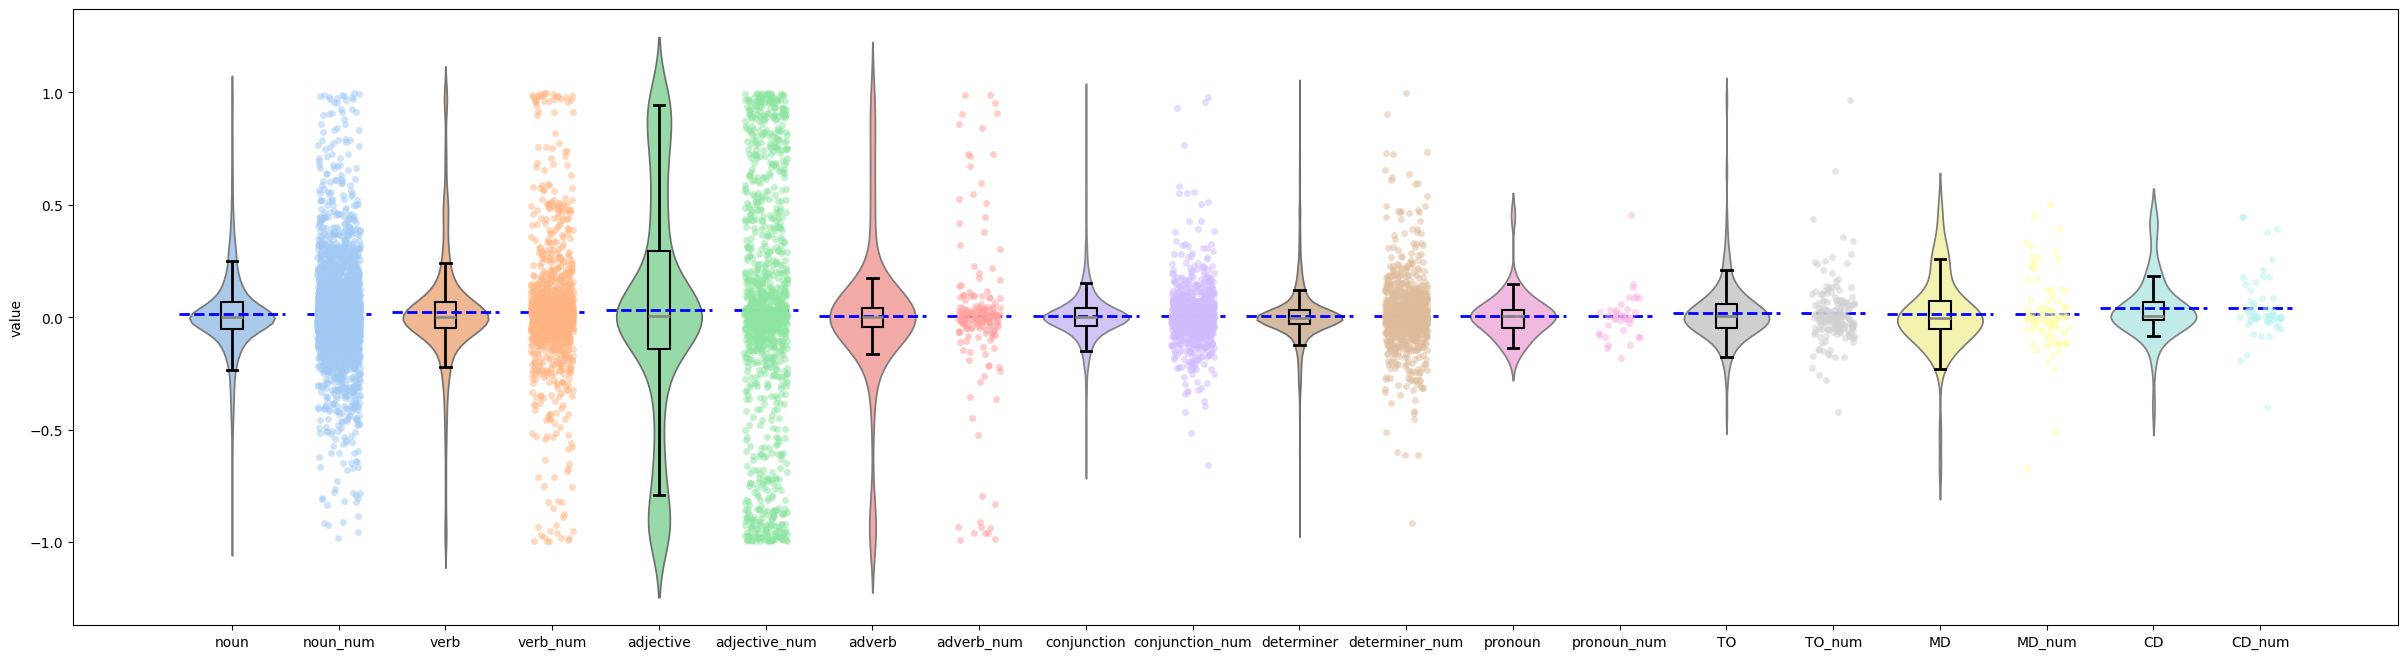

In [35]:
# 名词  动词 限定词 形容词 连词 副词 不定式 情态动词 基数词 代词
get_paper_picture(comment_df_all_type)

In [36]:
for column_name in comment_df_all_type.select_dtypes(include=[np.number]).columns:
    # 使用dropna()方法排除NaN值
    non_nan_count = len(comment_df_all_type[column_name].dropna())
    print(column_name)
    print(non_nan_count)

noun
3654
verb
1406
adjective
1237
adverb
190
conjunction
1093
determiner
1398
pronoun
39
TO
179
MD
89
CD
59


In [37]:
for column_name in comment_df_all_type.select_dtypes(include=[np.number]).columns:
    print(len(comment_df_all_type[column_name]))

3654
3654
3654
3654
3654
3654
3654
3654
3654
3654


In [38]:
comment_df_all_type_abs = comment_df_all_type.abs()
comment_df_all_type_abs.head()

,noun,verb,adjective,adverb,conjunction,determiner,pronoun,TO,MD,CD
0,0.308631,0.055413,0.104864,0.083484,0.088801,0.016095,0.055710,0.249609,0.051728,0.158738
1,0.147227,0.058519,0.013625,0.958353,0.037493,0.001650,0.009587,0.135214,0.009205,0.018925
2,0.073194,0.324562,0.056158,0.017447,0.086454,0.229381,0.007516,0.115769,0.031983,0.063610
3,0.011863,0.412151,0.010260,0.003761,0.035270,0.140302,0.146850,0.046084,0.112720,0.040348
4,0.008437,0.342226,0.004846,0.024650,0.119017,0.021734,0.087795,0.036791,0.001974,0.007544


noun           0.117358
verb           0.140513
adjective      0.369827
adverb         0.176892
conjunction    0.069638
determiner     0.068470
pronoun        0.064297
TO             0.081904
MD             0.109239
CD             0.084794
dtype: float64


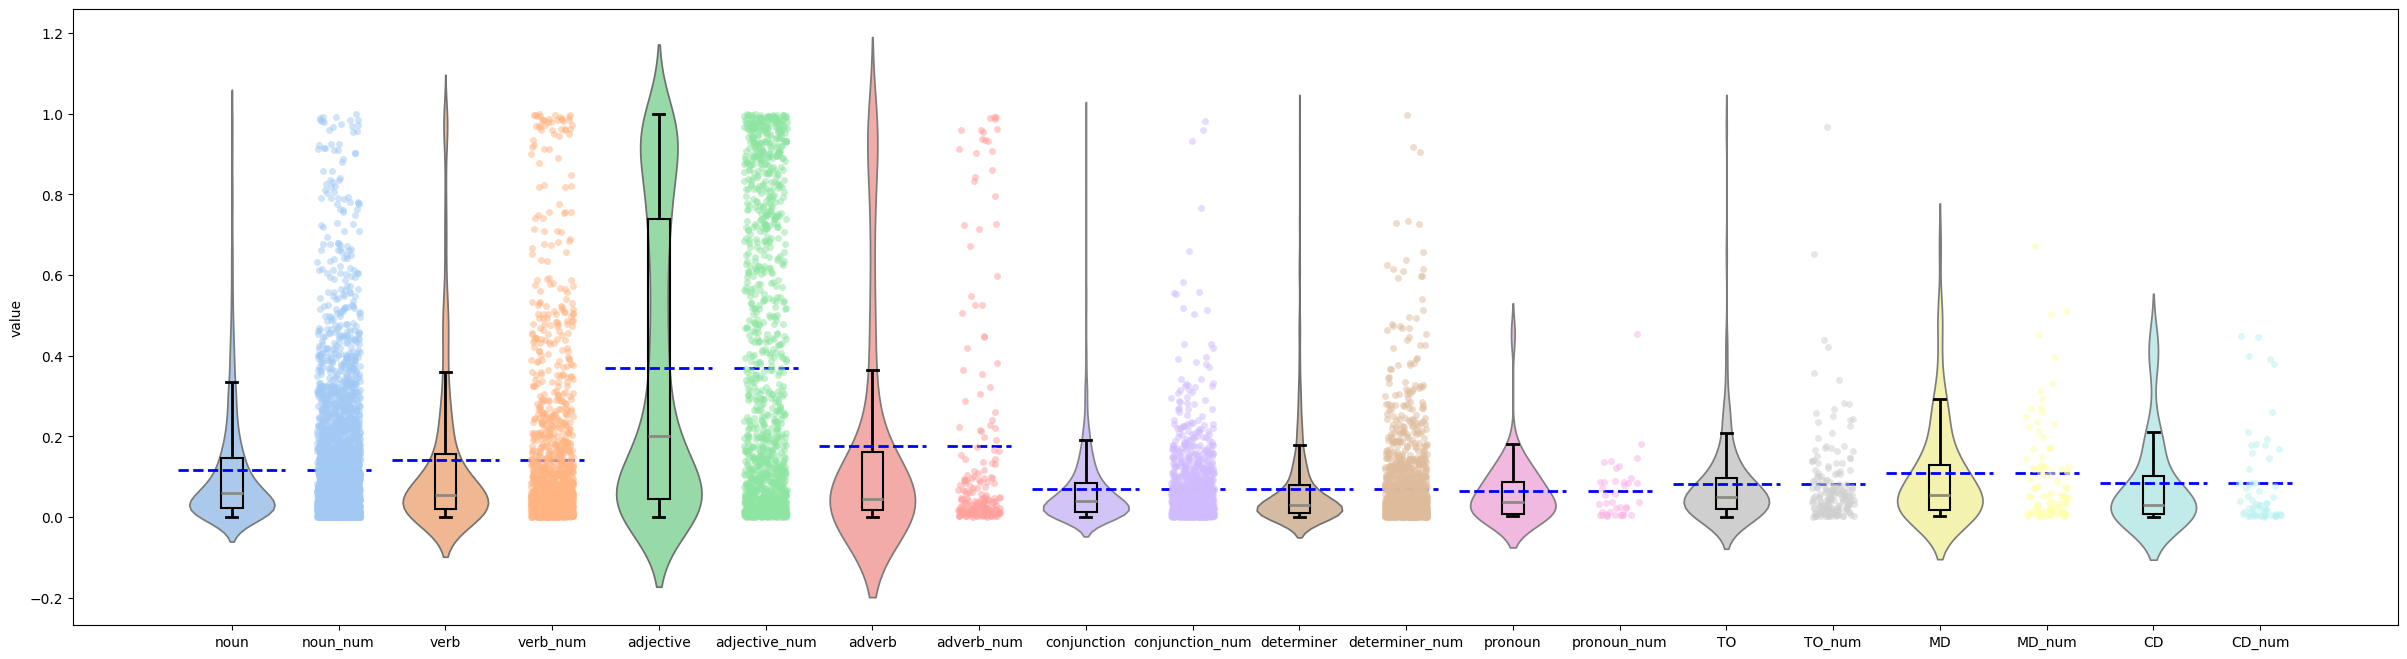

In [39]:
get_paper_picture(comment_df_all_type_abs)

列 noun 的第1个分位数: -0.25454330983147905 	第99个分位数: 0.3273481189160176	此列删除数量366
列 verb 的第1个分位数: -0.29519713698427286 	第99个分位数: 0.48439397610079715	此列删除数量142
列 adjective 的第1个分位数: -0.9427265836932972 	第99个分位数: 0.9311959302520456	此列删除数量124
列 adverb 的第1个分位数: -0.8162864848757768 	第99个分位数: 0.6951435622105193	此列删除数量20
列 conjunction 的第1个分位数: -0.15271436282554995 	第99个分位数: 0.1773118405361669	此列删除数量110
列 determiner 的第1个分位数: -0.14815579285294717 	第99个分位数: 0.19024873526892386	此列删除数量140
列 pronoun 的第1个分位数: -0.12689886980117152 	第99个分位数: 0.13726165274870608	此列删除数量4
列 TO 的第1个分位数: -0.15310899636502487 	第99个分位数: 0.23994276651577742	此列删除数量18
列 MD 的第1个分位数: -0.16133411150562757 	第99个分位数: 0.3040211883085625	此列删除数量10
列 CD 的第1个分位数: -0.09209884035994503 	第99个分位数: 0.3802143997195738	此列删除数量6
所有列的总共删除的数量: 940
noun           0.010672
verb           0.016364
adjective      0.035710
adverb         0.008348
conjunction    0.002678
determiner     0.002406
pronoun       -0.001536
TO             0.008573
MD             0.01

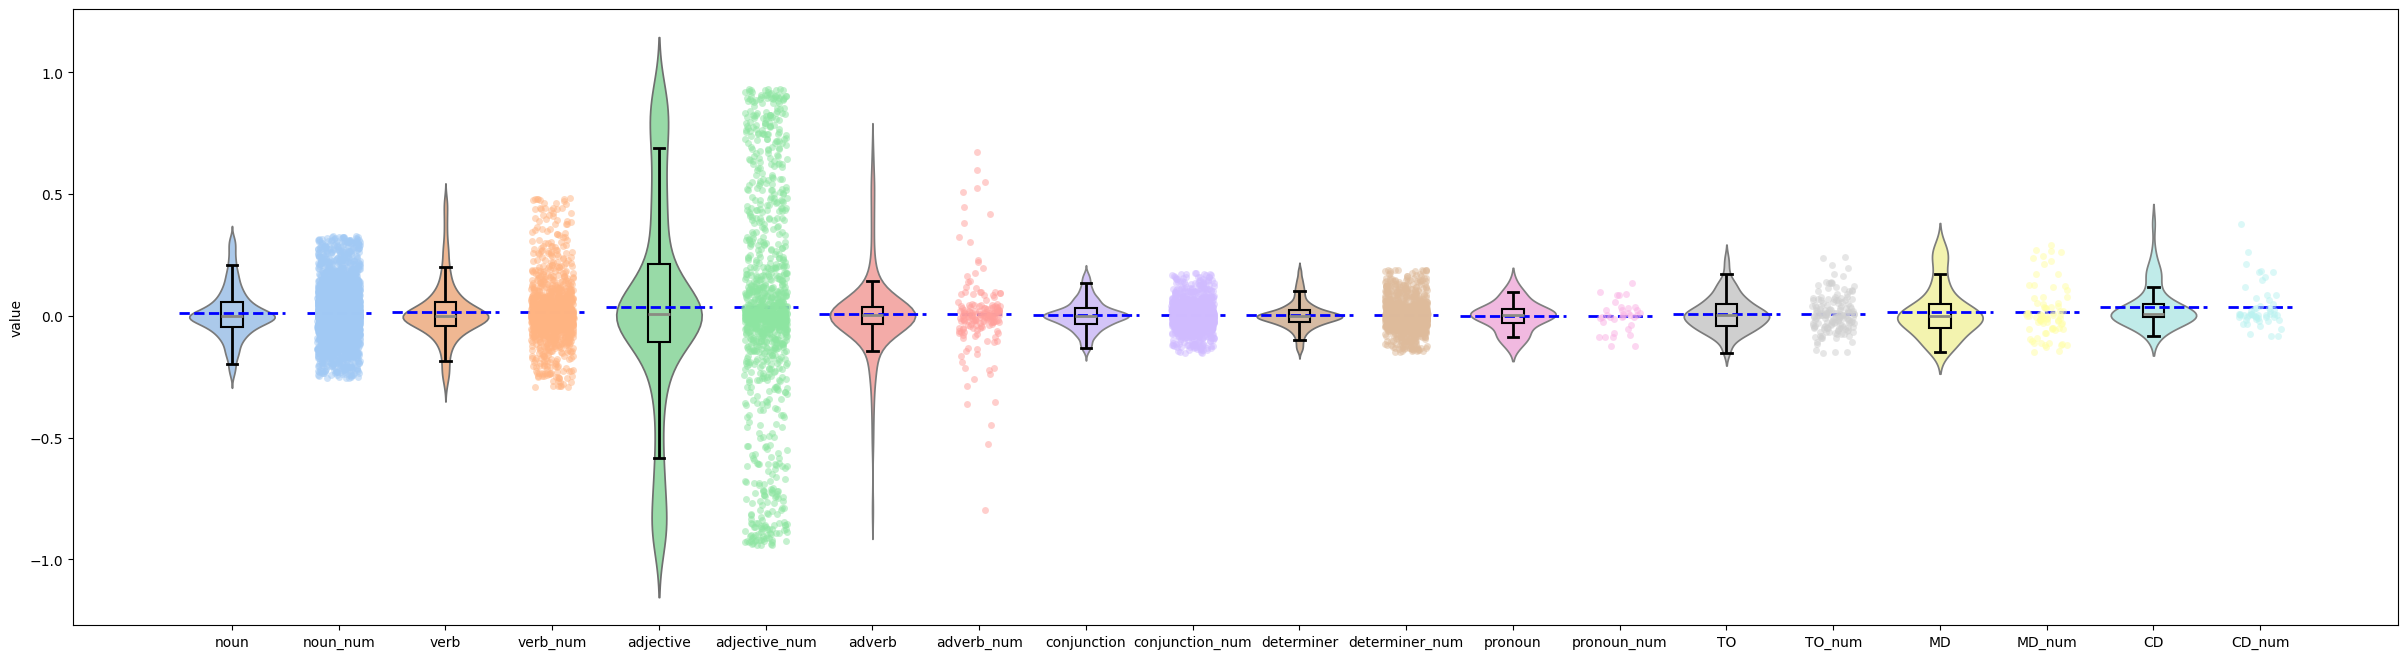

In [40]:
# 截尾处理 5%

def Winsorization_outliers_2(df):
    total_nan_count_new = 0  # 初始化总共删除的数量

    for column_name in df.select_dtypes(include=[np.number]).columns:
        q1 = np.percentile(df[column_name].dropna(), 5)
        q3 = np.percentile(df[column_name].dropna(), 95)
        
        # 计算替换前的NaN数量
        nan_count_before = df[column_name].isna().sum()

        df[column_name] = df[column_name].apply(lambda x: np.nan if x < q1 or x > q3 else x)
        
        # 计算替换后的NaN数量
        nan_count_after = df[column_name].isna().sum()
        
        nan_count_new = nan_count_after - nan_count_before
               
        total_nan_count_new += nan_count_new    # 总共删除的数量
        
        print(f'列 {column_name} 的第1个分位数: {q1} \t第99个分位数: {q3}\t此列删除数量{nan_count_new}')
    print(f'所有列的总共删除的数量: {total_nan_count_new}')
    return df

all_colunm_df_true_for_Winsorization_5 = comment_df_all_type.copy()
all_colunm_df_true_Winsorization_5 = Winsorization_outliers_2(all_colunm_df_true_for_Winsorization_5)

get_paper_picture(all_colunm_df_true_Winsorization_5)

noun           0.075287
verb           0.082084
adjective      0.302645
adverb         0.091740
conjunction    0.045285
determiner     0.040055
pronoun        0.045390
TO             0.054819
MD             0.075299
CD             0.055755
dtype: float64


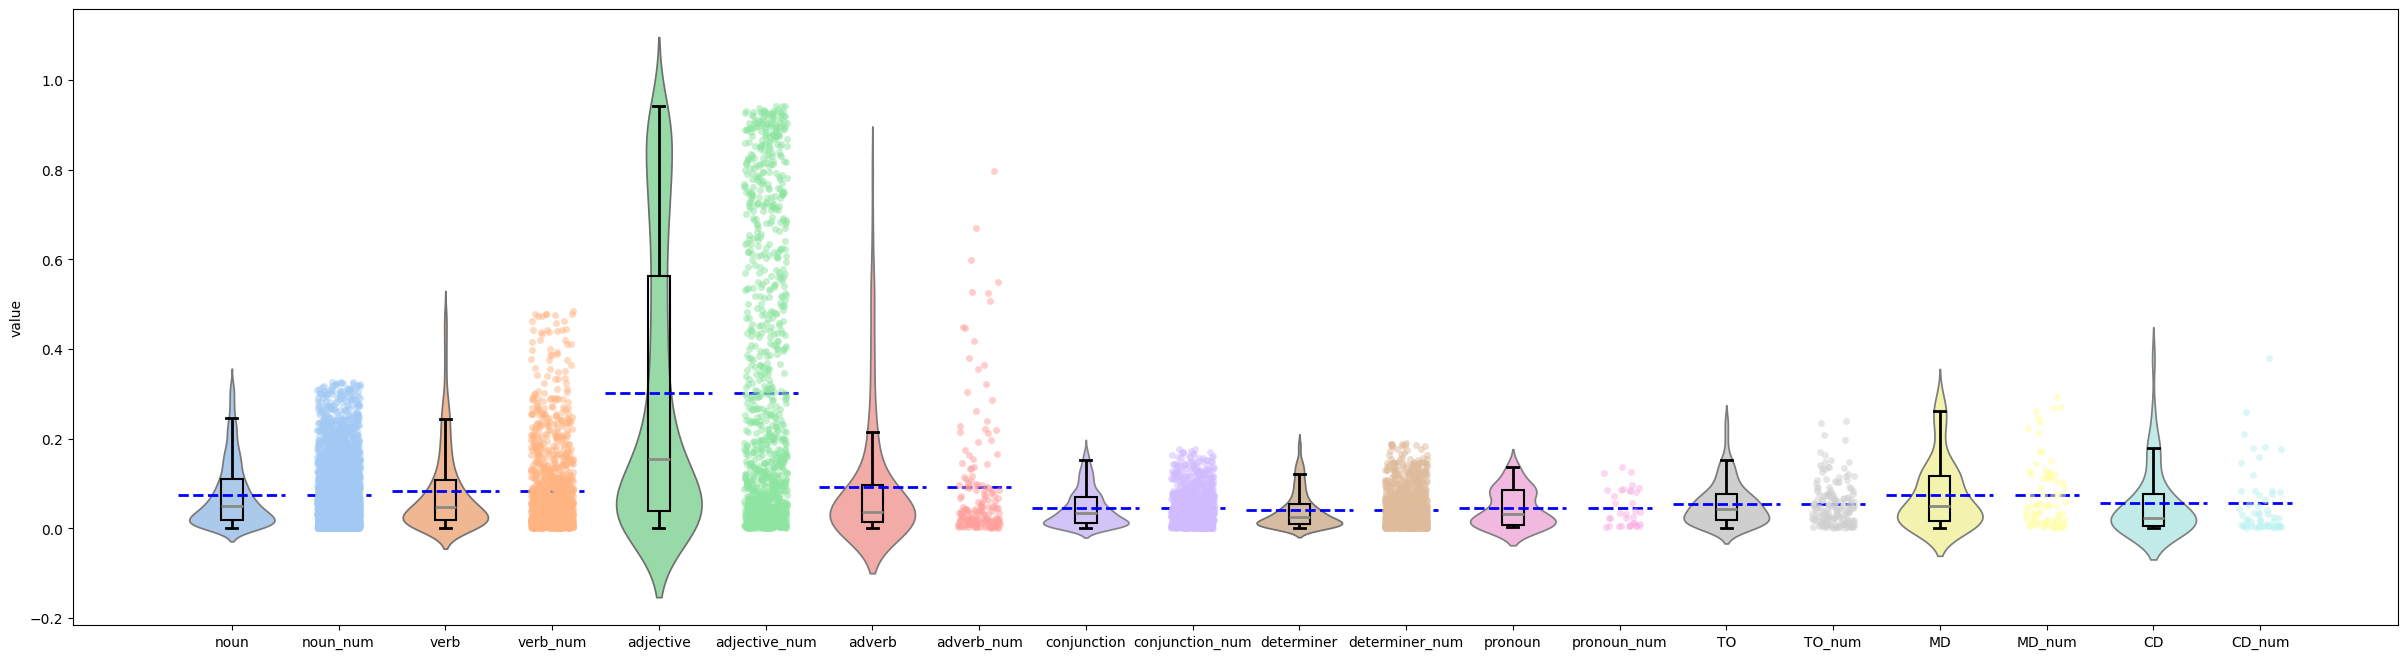

In [41]:
all_colunm_df_Winsorization_true_5_abs = all_colunm_df_true_Winsorization_5.abs()
get_paper_picture(all_colunm_df_Winsorization_true_5_abs)

下四分位数: -0.05322545852838347, 上四分位数: 0.06826916360111485, 最小值下界: -0.23546739172263095, 最大值上界: 0.2505110967953623	此列删除数量501
下四分位数: -0.049600720827836904, 上四分位数: 0.06694996188940855, 最小值下界: -0.22442674490370507, 最大值上界: 0.24177598596527672	此列删除数量257
下四分位数: -0.1403718547220587, 上四分位数: 0.294465516941781, 最小值下界: -0.7926279122178184, 最大值上界: 0.9467215744375407	此列删除数量185
下四分位数: -0.04576222837385277, 上四分位数: 0.042564284617558845, 最小值下界: -0.1782519978609702, 最大值上界: 0.17505405410467628	此列删除数量45
下四分位数: -0.037493350917411884, 上四分位数: 0.0395777421442547, 最小值下界: -0.15309999050991174, 最大值上界: 0.15518438173675456	此列删除数量128
下四分位数: -0.030297484798513803, 上四分位数: 0.030565758231139016, 最小值下界: -0.12159234934299304, 最大值上界: 0.12186062277561824	此列删除数量228
下四分位数: -0.046018397153664445, 上四分位数: 0.033532314438128825, 最小值下界: -0.16534446454135437, 最大值上界: 0.15285838182581873	此列删除数量2
下四分位数: -0.04623244547907446, 上四分位数: 0.0602117482958944, 最小值下界: -0.20589873614152776, 最大值上界: 0.2198780389583477	此列删除数量15
下四分位数: -0.0533001539340

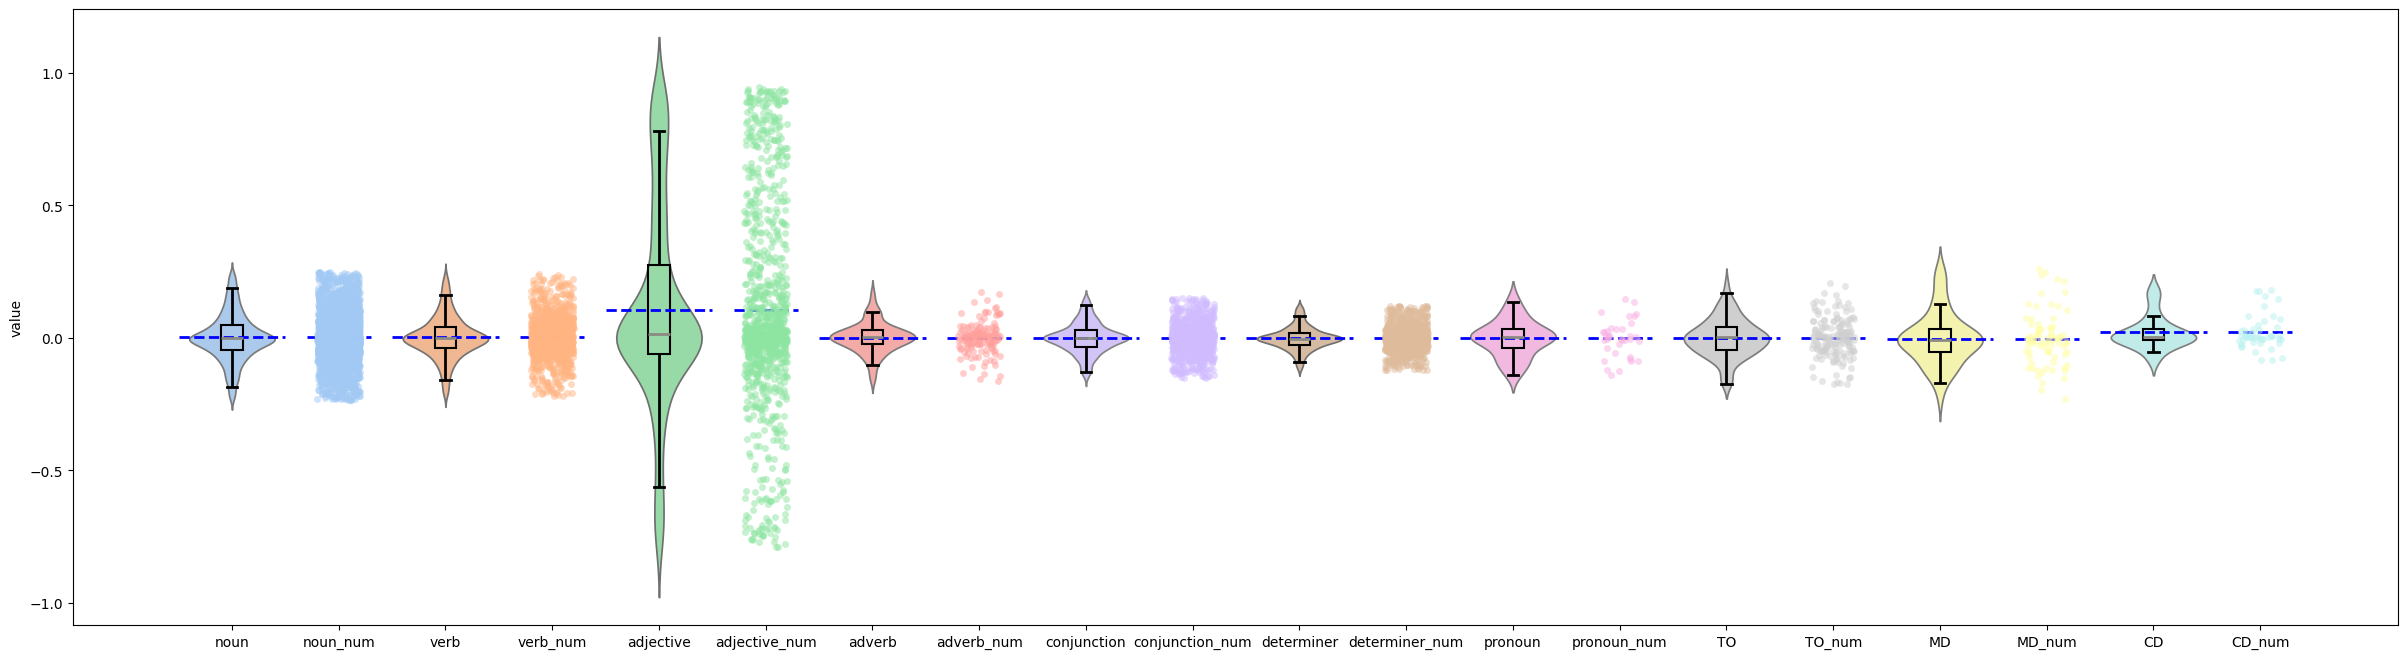

In [42]:
# 四分位距法
def iqr_outliers(df):
    total_nan_count_new = 0  # 初始化总共删除的数量

    for column_name in df.select_dtypes(include=[np.number]).columns:
        q1 = df[column_name].quantile(0.25)
        q3 = df[column_name].quantile(0.75)
        iqr = q3 - q1
        Lower_tail = q1 - 1.5 * iqr
        Upper_tail = q3 + 1.5 * iqr
        
        # 计算替换前的NaN数量
        nan_count_before = df[column_name].isna().sum()

        df[column_name] = df[column_name].apply(lambda x: np.nan if x < Lower_tail or x > Upper_tail else x)
        
        # 计算替换后的NaN数量
        nan_count_after = df[column_name].isna().sum()
        
        nan_count_new = nan_count_after - nan_count_before
               
        total_nan_count_new += nan_count_new    # 总共删除的数量
        print(f'下四分位数: {q1}, 上四分位数: {q3}, 最小值下界: {Lower_tail}, 最大值上界: {Upper_tail}\t此列删除数量{nan_count_new}')
    print(f'所有列的总共删除的数量: {total_nan_count_new}')
    return df

all_colunm_df_true_for_iqr = comment_df_all_type.copy()
all_colunm_df_true_iqr = iqr_outliers(all_colunm_df_true_for_iqr)

get_paper_picture(all_colunm_df_true_iqr)

In [43]:
all_colunm_df_iqr_true_abs = all_colunm_df_true_iqr.abs()
all_colunm_df_iqr_true_abs.head()

,noun,verb,adjective,adverb,conjunction,determiner,pronoun,TO,MD,CD
0,NaN,0.055413,0.104864,0.083484,0.088801,0.016095,0.055710,NaN,0.051728,0.158738
1,0.147227,0.058519,0.013625,NaN,0.037493,0.001650,0.009587,0.135214,0.009205,0.018925
2,0.073194,NaN,0.056158,0.017447,0.086454,NaN,0.007516,0.115769,0.031983,0.063610
3,0.011863,NaN,0.010260,0.003761,0.035270,NaN,0.146850,0.046084,0.112720,0.040348
4,0.008437,NaN,0.004846,0.024650,0.119017,0.021734,0.087795,0.036791,0.001974,0.007544


noun           0.066399
verb           0.058272
adjective      0.269499
adverb         0.042127
conjunction    0.043058
determiner     0.032042
pronoun        0.050654
TO             0.056122
MD             0.072330
CD             0.042098
dtype: float64


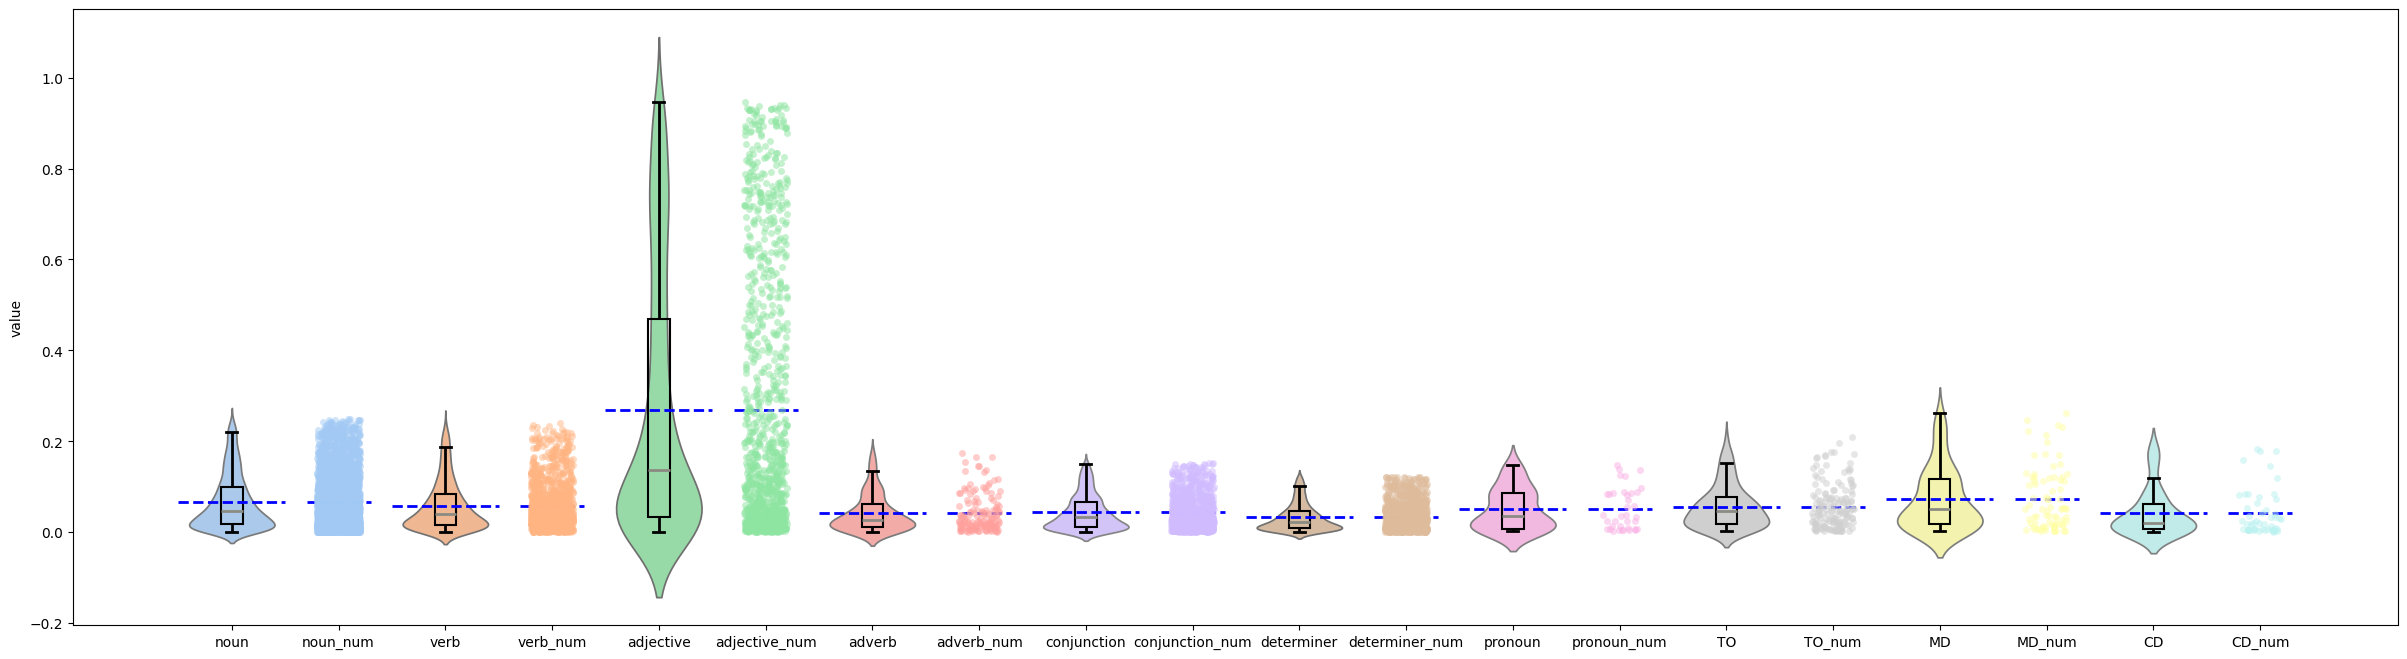

In [44]:
get_paper_picture(all_colunm_df_iqr_true_abs)

In [45]:
# 画出和论文一样的图
def get_paper_picture_other_color(df):
    
    # 图形大小，随时改
    plt.figure(figsize=(30, 8))

    # 使用 'viridis' colormap
    colormap = plt.colormaps['viridis']
    palette = [colormap(i) for i in np.linspace(0, 1, len(df.columns))]
    
    # 画图
    for i, col in enumerate(df.columns):
        # 小提琴
        sns.violinplot(x=np.full(len(df), i), y=df[col], inner=None, hue=np.full(len(df), i), palette=[palette[i]], legend=False)
        # 散点图
        sns.stripplot(x=np.full(len(df), i) - 0.5, y=df[col], color=palette[i], alpha=0.5, jitter=0.2, legend=False)
        # 箱线图
        sns.boxplot(x=np.full(len(df), i), y=df[col], width=0.2, showcaps=True, showfliers=False,  # 不显示异常值
                    boxprops=dict(facecolor='none', edgecolor='black', linewidth=1.5),  # 更改边框线条粗细
                    whiskerprops=dict(color='black', linewidth=2), 
                    capprops=dict(color='black', linewidth=2), 
                    medianprops=dict(color='#8B8B83', linewidth=2), 
                    flierprops=dict(marker='o', color='red', alpha=0.5))
    # 均值线
    mean_value = df.mean()
    print(mean_value)
    new_mean_value = [item for item in mean_value for _ in range(2)]
    for i in range(len(new_mean_value)):
        if i % 2 == 0:
            plt.plot([i - 0.5, i + 0.5], [new_mean_value[i], new_mean_value[i]], color='#FF00FF', linestyle='--', linewidth=2)
        else:
            plt.plot([i - 0.3, i + 0.3], [new_mean_value[i], new_mean_value[i]], color='#FF00FF', linestyle='--', linewidth=2)



    # 横坐标标签
    label_name = [item for sublist in [[x, f'{x}_num'] for x in df.columns] for item in sublist]
    ax = plt.gca()
    ax.set_xticks(np.arange(len(label_name)))  # 设置标签的位置
    ax.set_xticklabels(label_name)

    plt.ylabel('value')

    plt.show()


noun           0.015497
verb           0.022172
adjective      0.031809
adverb         0.003309
conjunction    0.007437
determiner     0.007040
pronoun        0.005796
TO             0.017544
MD             0.016434
CD             0.041044
dtype: float64


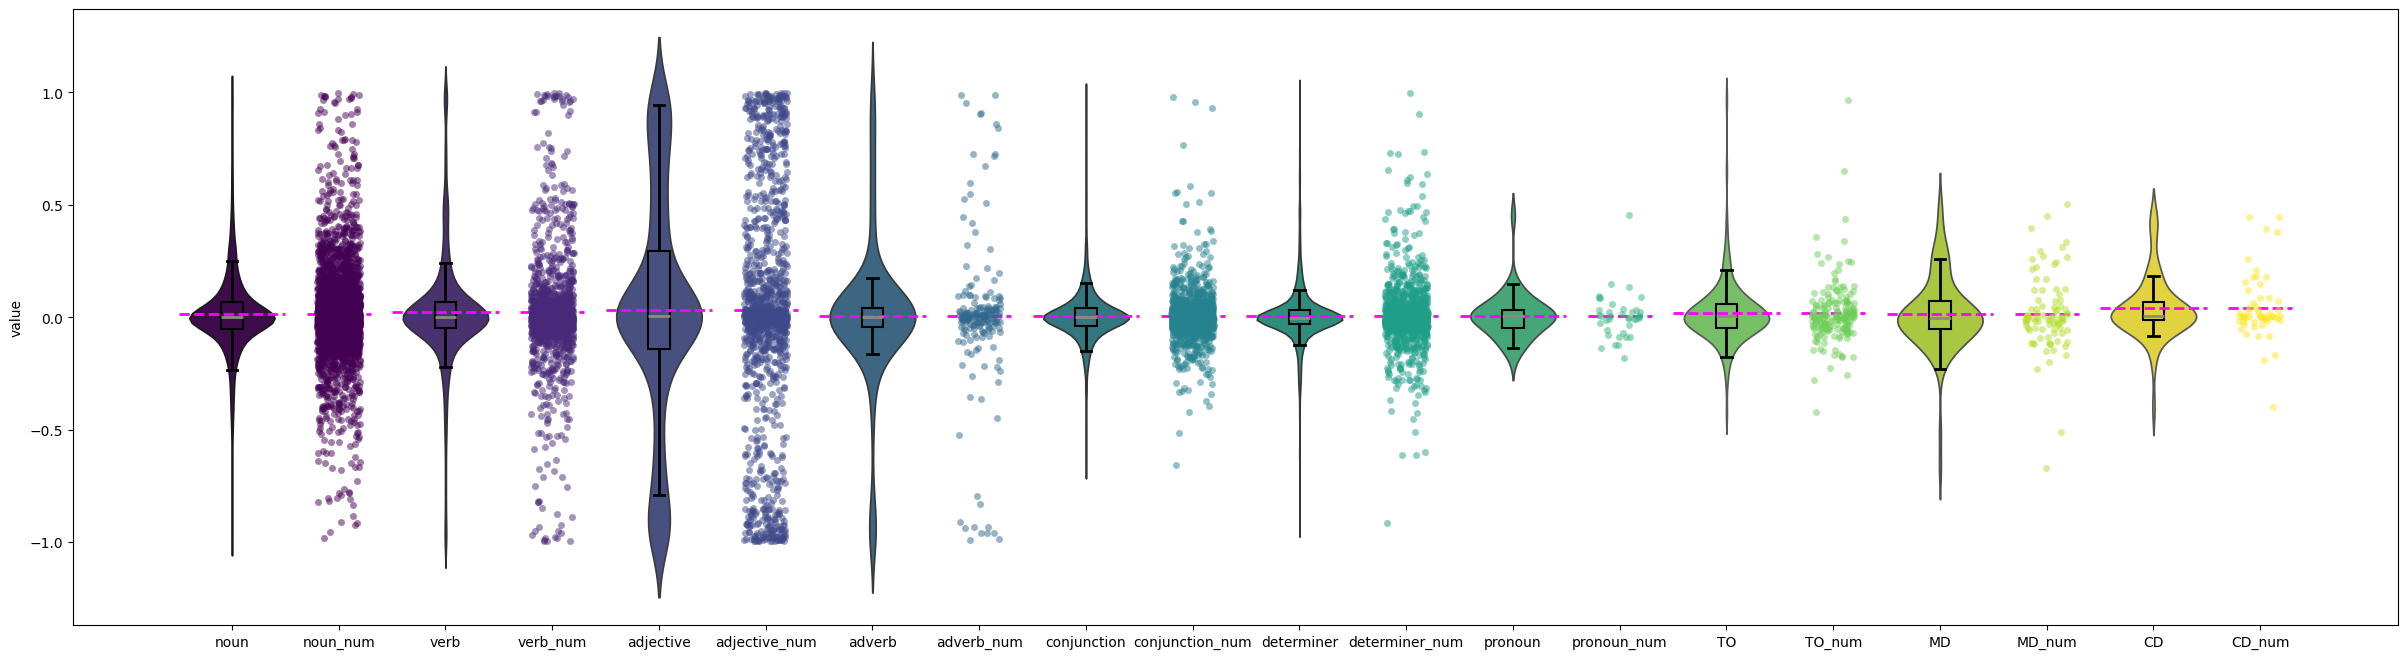

In [46]:
# 原数据  * 100  ，按照道理数据分布应不会变
comment_df_all_type_copy = comment_df_all_type.copy()
get_paper_picture_other_color(comment_df_all_type_copy)